### Importación de datos



**Challenge Alura Store Data Science.**
Descripcion del desafio:
En este Desafio se nos pide el analisis, de distintas tiendas.
Según una evaluación realizada que se basara en cinco aspectos los cuales son:

1.   Facturación total de cada tienda,para determinar cúal tiene mayores ventas.
2.   Las categorias más populares de cada tienda.
3.   Él producto más vendido de cada tienda.
4.   Él promedio de evaluacion de los clientes.
5.   Productos más y menos vendidos de cada tienda.
6.   Costo promedio del envío que realiza la tienda hacia el destino del cliente.
7.   Realizar un analisis de los resultados obtenidos.

In [96]:
# Importar la libreria de pandas y los datos desde el repositorio de GitHub.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import folium

# URLs raw de los archivos CSV.
url =  "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

# Datos cargados desde las URLs raw.
tienda_1 = pd.read_csv(url)
tienda_2 = pd.read_csv(url2)
tienda_3 = pd.read_csv(url3)
tienda_4 = pd.read_csv(url4)

tienda.head()




,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.00,6900.00,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.61,-74.08
1,Mesa de comedor,Muebles,192300.00,8400.00,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25,-75.56
2,Juego de mesa,Juguetes,209600.00,15900.00,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.40,-75.51
3,Microondas,Electrodomésticos,757500.00,41000.00,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.44,-76.52
4,Silla de oficina,Muebles,335200.00,20200.00,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25,-75.56


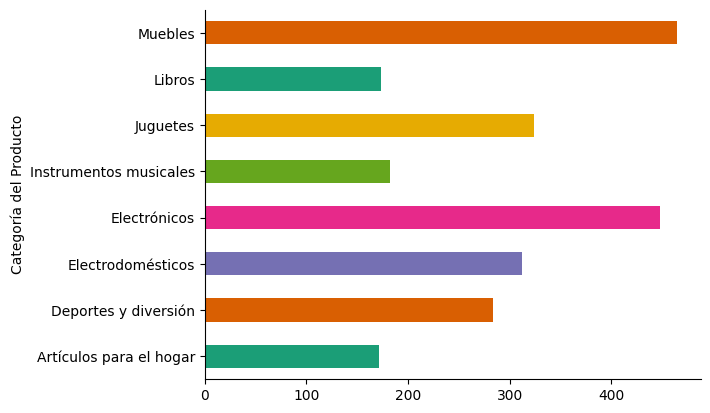

In [95]:
# @title Categoría del Producto

from matplotlib import pyplot as plt
import seaborn as sns
tienda.groupby('Categoría del Producto').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

#1. Análisis de facturación



In [98]:

def analizar_precios_validos(tiendas, nombres_tiendas):
    """
    Analiza y muestra los precios válidos (mayores a 0) por tienda,
    incluyendo suma total, cantidad de productos y porcentaje del total general.

    Args:
        tiendas: Lista de DataFrames de cada tienda
        nombres_tiendas: Lista de nombres de las tiendas
    """
    resultados = []

    # Procesamiento de datos
    for df, nombre in zip(tiendas, nombres_tiendas):
        precios_validos = df[df['Precio'] > 0]['Precio']
        suma = precios_validos.sum()
        cantidad = len(precios_validos)
        resultados.append((nombre, suma, cantidad))

    total_general = sum(suma for _, suma, _ in resultados)

    # Obtención de resultados
    print("\n" + "="*60)
    print("ANÁLISIS DE PRECIOS VÁLIDOS POR TIENDA".center(60))
    print("="*60)

    for nombre, suma, cantidad in resultados:
        pct = (suma / total_general) * 100
        print(f"\n• {nombre.upper()}:")
        print(f"  - Suma total: ${suma:,.0f}")
        print(f"  - Productos válidos: {cantidad}")
        print(f"  - Porcentaje del total: {pct:.1f}%")

    print("\n" + "-"*60)
    print(f"TOTAL GENERAL: ${total_general:,.0f}")
    print("="*60)

# Datos de cada tienda
tiendas = [tienda_1, tienda_2, tienda_3, tienda_4]
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

# Realizar análisis
analizar_precios_validos(tiendas, nombres_tiendas)


           ANÁLISIS DE PRECIOS VÁLIDOS POR TIENDA           

• TIENDA 1:
  - Suma total: $1,150,880,400
  - Productos válidos: 2359
  - Porcentaje del total: 26.1%

• TIENDA 2:
  - Suma total: $1,116,343,500
  - Productos válidos: 2359
  - Porcentaje del total: 25.4%

• TIENDA 3:
  - Suma total: $1,098,019,600
  - Productos válidos: 2359
  - Porcentaje del total: 24.9%

• TIENDA 4:
  - Suma total: $1,038,375,700
  - Productos válidos: 2358
  - Porcentaje del total: 23.6%

------------------------------------------------------------
TOTAL GENERAL: $4,403,619,200


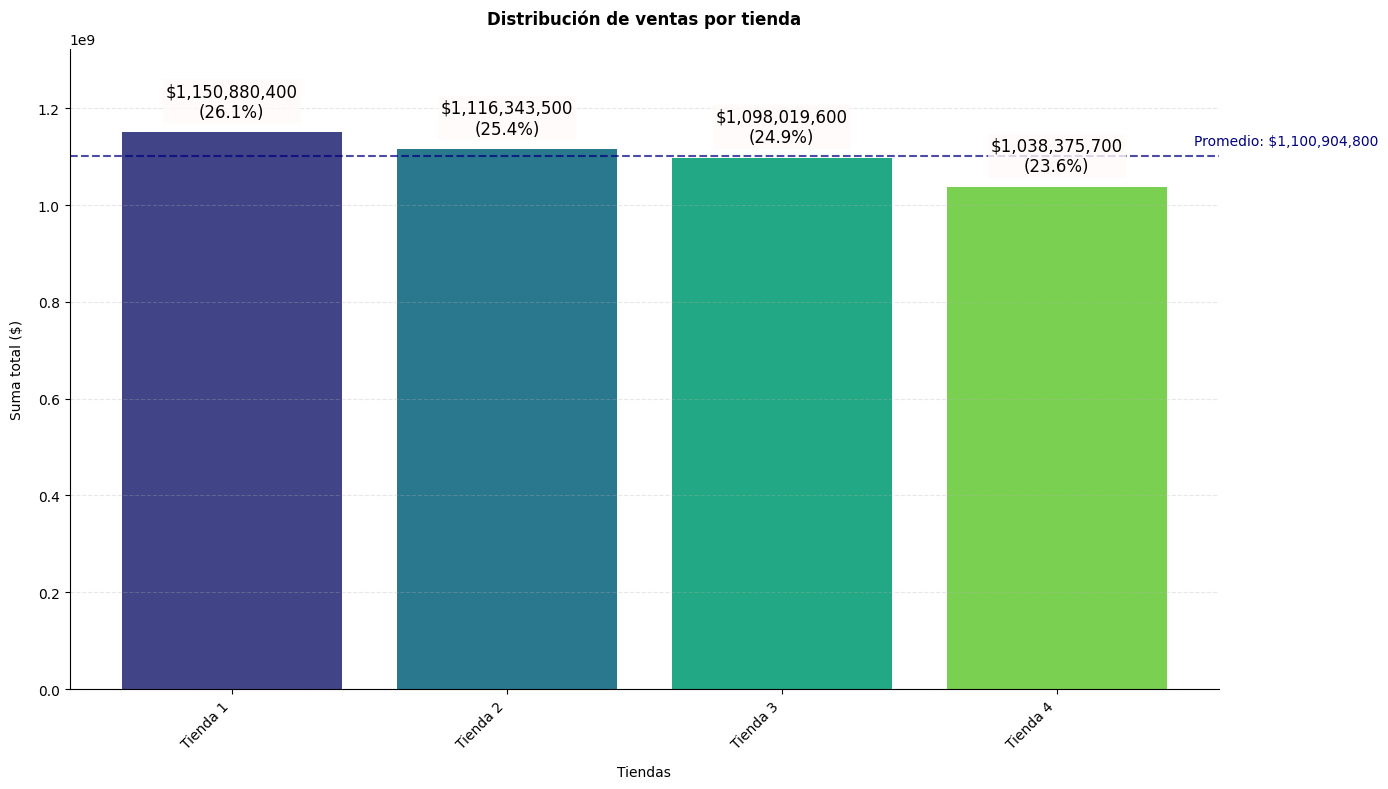

In [100]:
def plot_suma_precios_tiendas(totals, nombres_tiendas):
    """
    Crea un gráfico de barras con la suma de precios por tienda mostrando porcentajes.

    Args:
        totals: Lista con los totales por tienda
        nombres_tiendas: Lista de nombres de las tiendas
    """
    # Cálculo de porcentajes
    total_sum = sum(totals)
    porcentajes = [(total / total_sum) * 100 for total in totals]

    # Configuración del gráfico
    plt.figure(figsize=(14, 8))
    ax = plt.subplot()

    # Crear barras con paleta de colores
    bars = ax.bar(nombres_tiendas, totals, color=sns.color_palette("viridis", len(totals)))

    # Personalización del gráfico
    ax.set_title("Distribución de ventas por tienda", pad=18, fontsize=12, fontweight='bold')
    ax.set_xlabel("Tiendas", labelpad=10)
    ax.set_ylabel("Suma total ($)", labelpad=10)

    # Quitar bordes innecesarios
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)

    # Añadir etiquetas con valores y porcentajes
    for bar, total, porcentaje in zip(bars, totals, porcentajes):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + max(totals)*0.02,
                f'${total:,.0f}\n({porcentaje:.1f}%)',
                ha='center', va='bottom',
                fontsize=12,
                bbox=dict(facecolor='snow', alpha=0.8, edgecolor='none', pad=2))

    # Añadir línea del promedio
    promedio = total_sum / len(totals)
    ax.axhline(y=promedio, color='navy', linestyle='--', alpha=0.7)
    ax.text(len(totals)-0.5, promedio + max(totals)*0.02,
            f'Promedio: ${promedio:,.0f}',
            color='navy')

    # Ajustar límites y rotación
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, max(totals) * 1.15)
    plt.grid(axis='y', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

# Ejemplo de uso
totals = [1150880400, 1116343500, 1098019600, 1038375700]
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
plot_suma_precios_tiendas(totals, nombres_tiendas)

# 2. Analisis según categorias de la tienda.

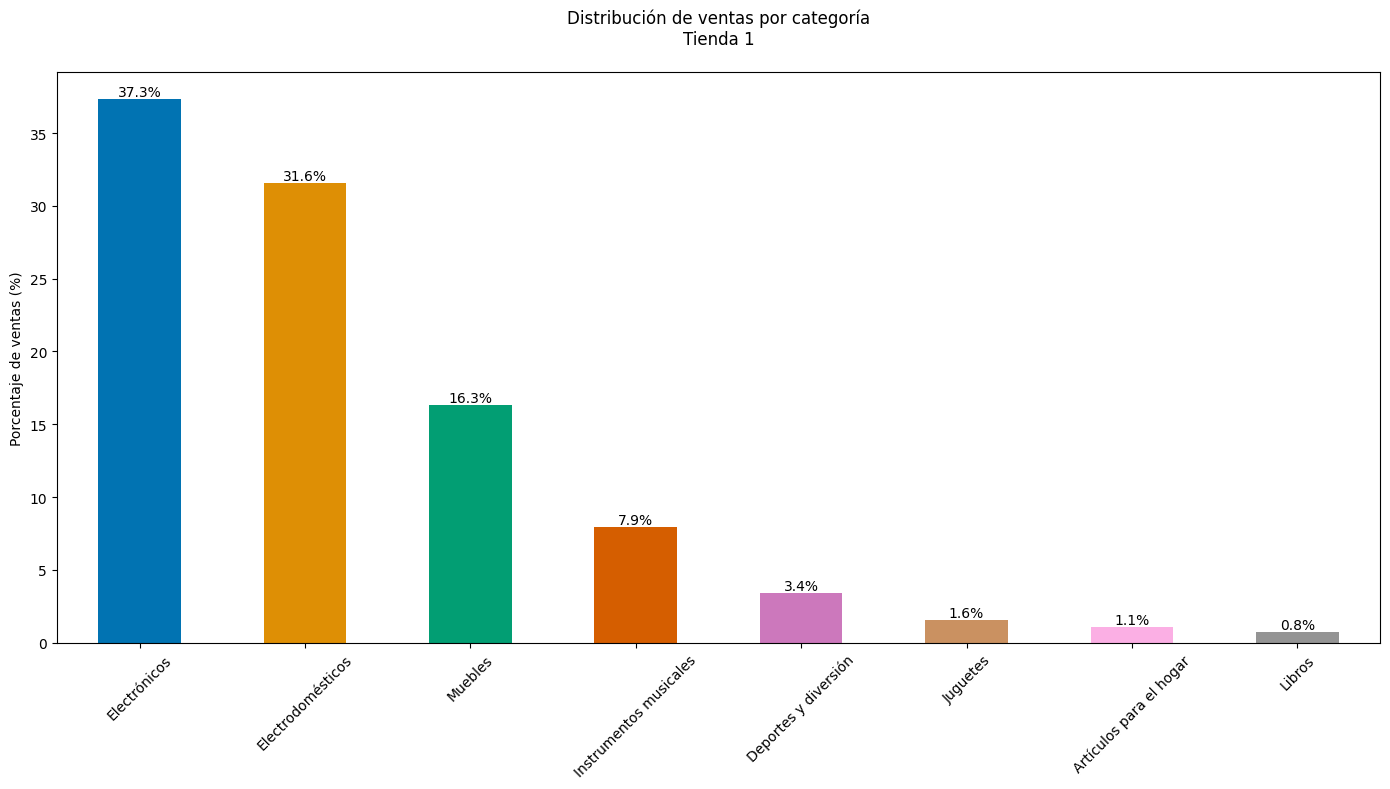

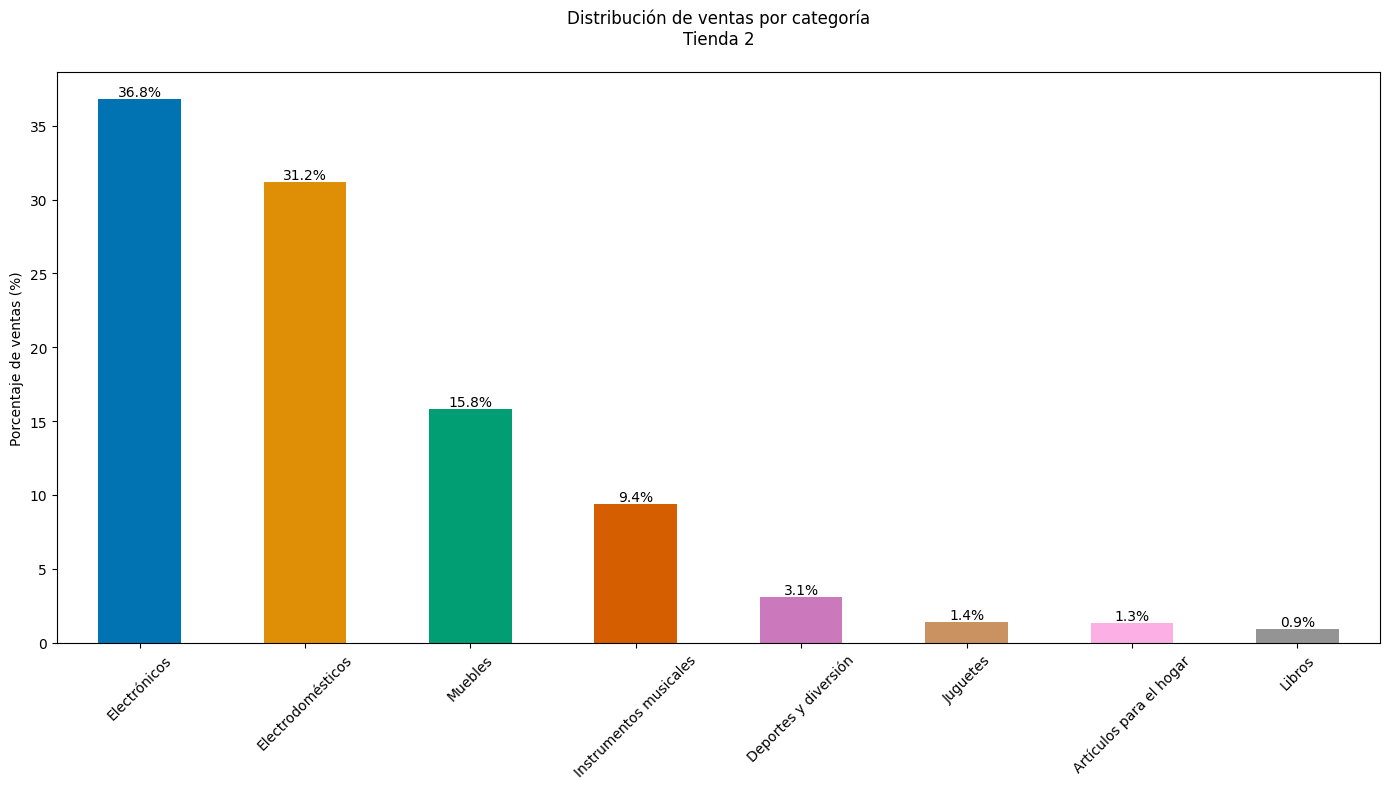

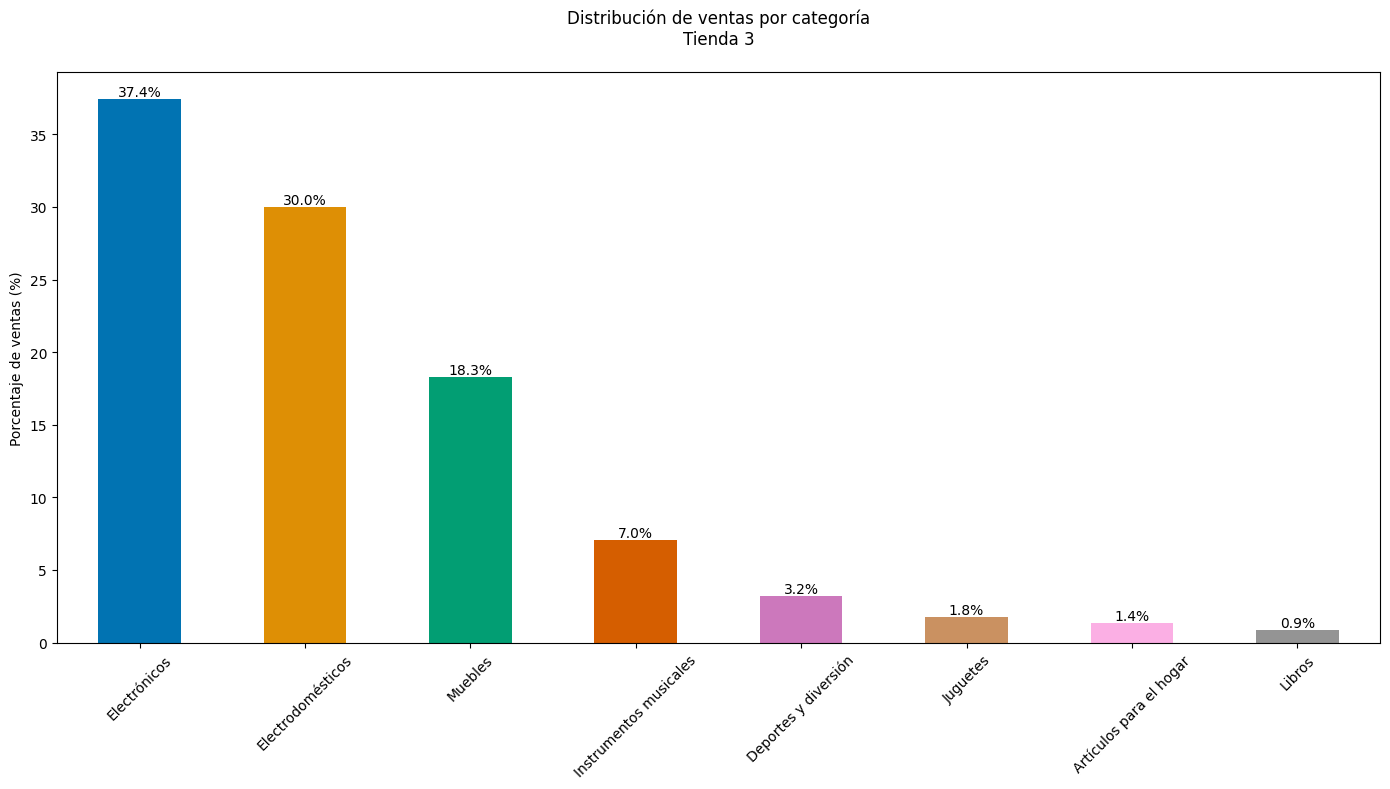

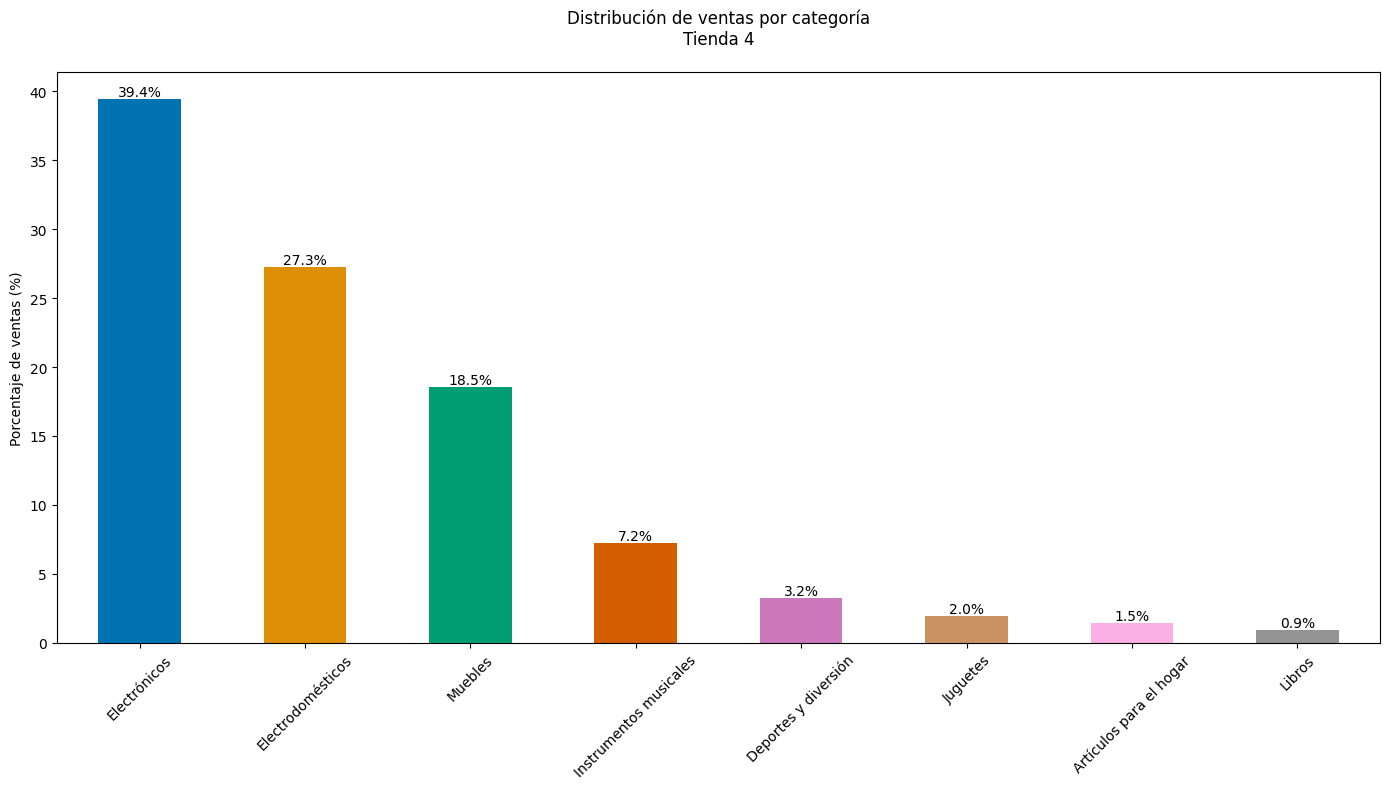

In [115]:
def plot_ventas_porcentaje(df, tienda_nombre, col_categoria='Categoría del Producto', col_precio='Precio'):
    """
    Muestra un gráfico de barras con el porcentaje de ventas por categoría

    Args:
        df: DataFrame con los datos de ventas
        tienda_nombre: Nombre de la tienda para el título
        col_categoria: Nombre de la columna de categorías (opcional)
        col_precio: Nombre de la columna de precios (opcional)
    """
    # Cálculos simplificados
    ventas_categoria = df.groupby(col_categoria)[col_precio].sum()
    porcentajes = ventas_categoria / ventas_categoria.sum() * 100

    # Configuración del gráfico
    plt.figure(figsize=(14, 8))
    ax = porcentajes.sort_values(ascending=False).plot(
        kind='bar',
        color=sns.color_palette("colorblind", len(porcentajes)),
        rot=45
    )

    # Títulos y etiquetas
    ax.set_title(f'Distribución de ventas por categoría\n{tienda_nombre}', pad=20)
    ax.set_xlabel('')
    ax.set_ylabel('Porcentaje de ventas (%)')

    # Añadir etiquetas de porcentaje
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}%',
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 5),
                   textcoords='offset points')

    plt.tight_layout()
    plt.show()

# Uso con listas para evitar repetición
tiendas = [
    (tienda_1, 'Tienda 1'),
    (tienda_2, 'Tienda 2'),
    (tienda_3, 'Tienda 3'),
    (tienda_4, 'Tienda 4')
]

for df_tienda, nombre in tiendas:
    plot_ventas_porcentaje(df_tienda, nombre)

# 3. Calificación promedio de la tienda


In [102]:
# Calcula el promedio de calificación para cada tienda
tienda_nombre = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
promedios_calificacion = []
for i, df in enumerate([tienda_1, tienda_2, tienda_3, tienda_4]):
    promedio = df['Calificación'].mean()
    promedios_calificacion.append(promedio)
    print(f'El promedio de calificación de {tienda_nombre[i]} es: {promedio:.2f}')

El promedio de calificación de Tienda 1 es: 3.98
El promedio de calificación de Tienda 2 es: 4.04
El promedio de calificación de Tienda 3 es: 4.05
El promedio de calificación de Tienda 4 es: 4.00


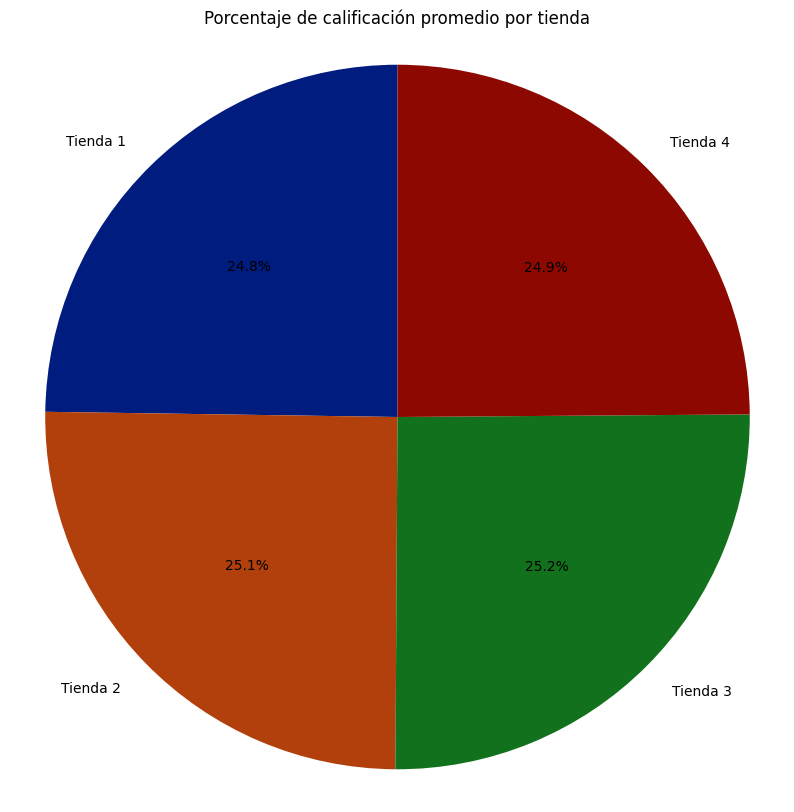

In [104]:
# Crea un gráfico circular con los porcentajes de calificación promedio
plt.figure(figsize=(10, 10))
plt.pie(promedios_calificacion, labels=tienda_nombre, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("dark"))
plt.title('Porcentaje de calificación promedio por tienda')
plt.axis('equal')  # Para que el gráfico sea un círculo
plt.show()

# 4. Productos más y menos vendidos

In [106]:
def analyze_product_sales(df, tienda_nombre, n_products=5):
    """
    Analiza y muestra los productos más y menos vendidos con sus porcentajes de venta.

    Args:
        df: DataFrame con datos de ventas
        tienda_nombre: Nombre de la tienda
        n_products: Número de productos a mostrar (por defecto 5)
    """
    # Cálculos en una sola línea
    sales = df.groupby('Producto')['Precio'].sum().sort_values(ascending=False)
    total = sales.sum()

    # Formateo de resultados
    def format_results(products, label):
        print(f"\n{label}:")
        for product, amount in products.items():
            print(f"• {product}: ${amount:,.0f} ({amount/total:.1%})")

    # Resultados
    print(f"\n{'='*40}\n🔍 Análisis de ventas: {tienda_nombre}\n{'='*40}")
    format_results(sales.head(n_products), f"TOP VENDIDOS {n_products} PRODUCTOS")
    format_results(sales.tail(n_products), f"BOTTOM VENDIDOS {n_products} PRODUCTOS")
    print(f"\nTotal general de ventas: ${total:,.2f}\n{'='*40}")

# Procesamiento automático de todas las tiendas
[analyze_product_sales(df, name) for df, name in [
    (tienda_1, 'Tienda 1'),
    (tienda_2, 'Tienda 2'),
    (tienda_3, 'Tienda 3'),
    (tienda_4, 'Tienda 4')
]]



🔍 Análisis de ventas: Tienda 1

TOP VENDIDOS 5 PRODUCTOS:
• TV LED UHD 4K: $142,150,200 (12.4%)
• Refrigerador: $112,143,300 (9.7%)
• Iphone 15: $97,902,200 (8.5%)
• Smart TV: $67,452,100 (5.9%)
• Lavadora de ropa: $65,783,600 (5.7%)

BOTTOM VENDIDOS 5 PRODUCTOS:
• Ajedrez de madera: $1,430,600 (0.1%)
• Set de vasos: $1,359,100 (0.1%)
• Cubo mágico 8x8: $696,900 (0.1%)
• Dinosaurio Rex: $688,900 (0.1%)
• Cuerda para saltar: $652,800 (0.1%)

Total general de ventas: $1,150,880,400.00

🔍 Análisis de ventas: Tienda 2

TOP VENDIDOS 5 PRODUCTOS:
• Iphone 15: $113,225,800 (10.1%)
• TV LED UHD 4K: $103,375,000 (9.3%)
• Refrigerador: $97,632,500 (8.7%)
• Lavadora de ropa: $66,762,300 (6.0%)
• Smart TV: $61,142,000 (5.5%)

BOTTOM VENDIDOS 5 PRODUCTOS:
• Set de vasos: $1,542,600 (0.1%)
• Ajedrez de madera: $1,287,700 (0.1%)
• Cuerda para saltar: $856,900 (0.1%)
• Dinosaurio Rex: $770,300 (0.1%)
• Cubo mágico 8x8: $643,600 (0.1%)

Total general de ventas: $1,116,343,500.00

🔍 Análisis de ventas:

[None, None, None, None]

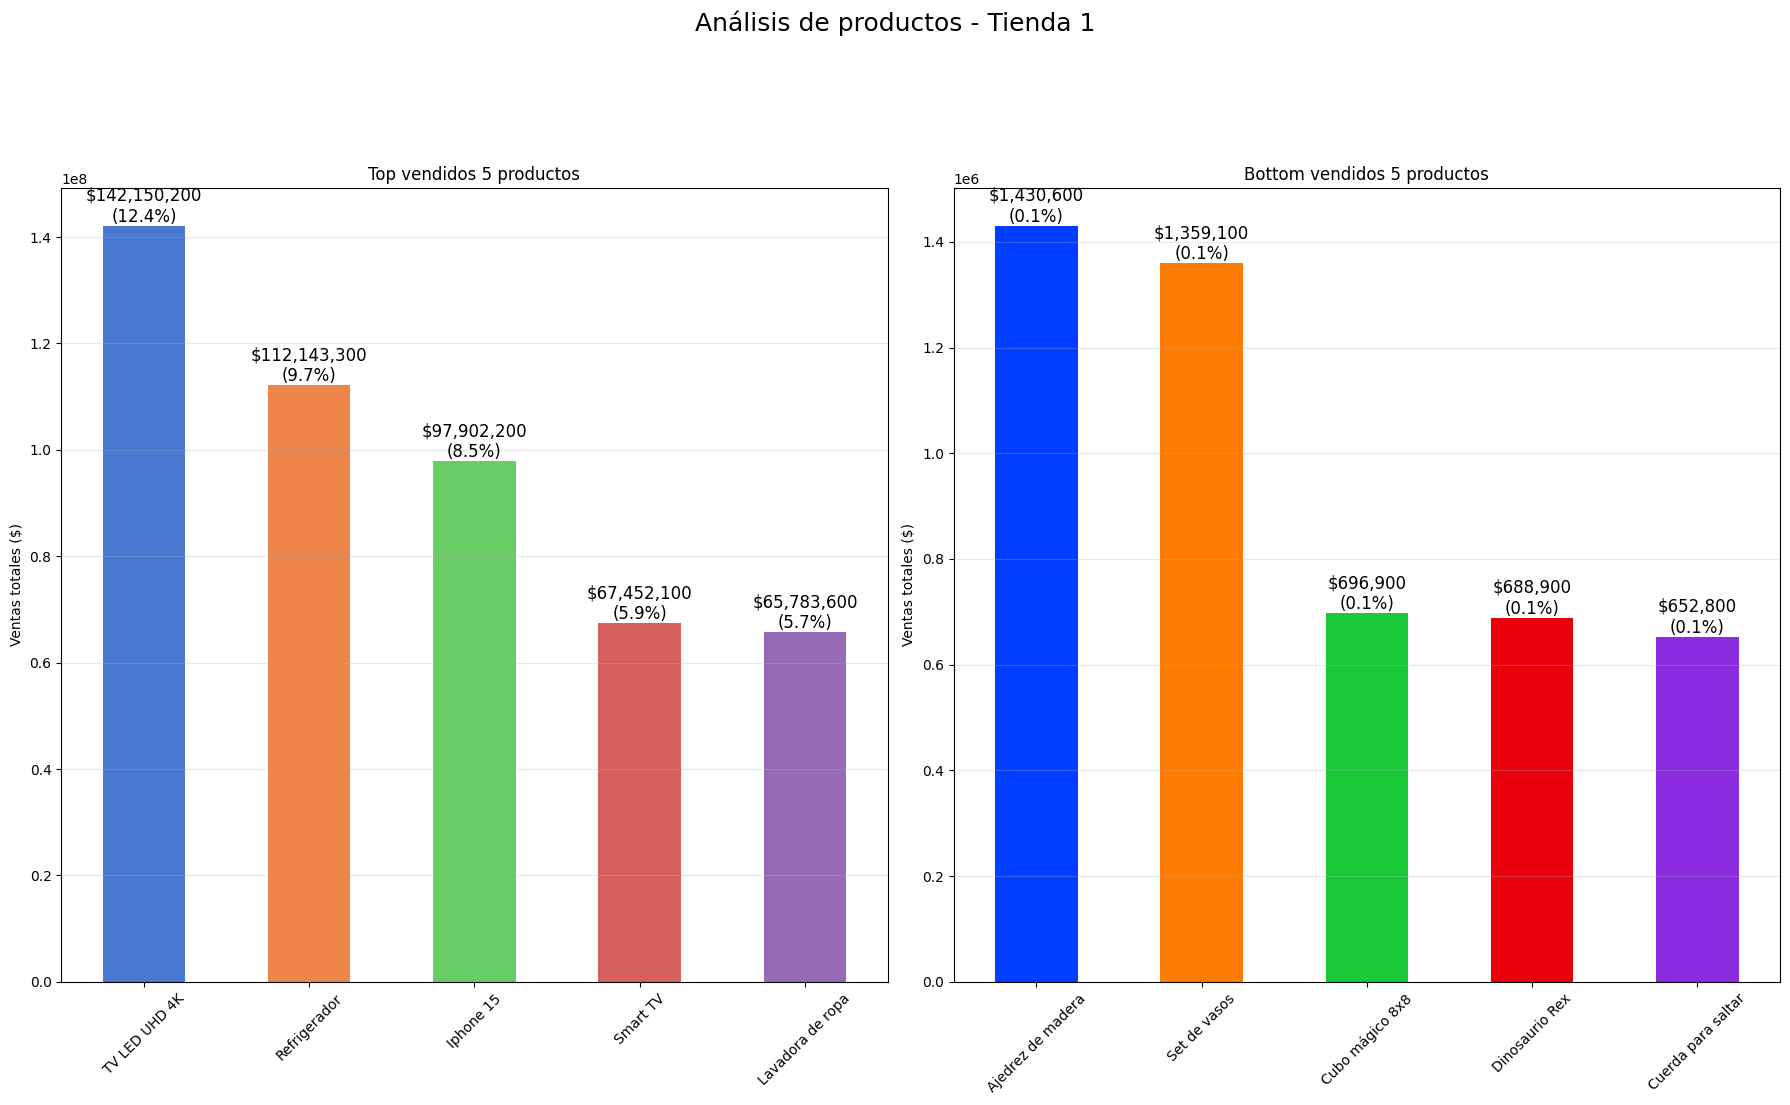

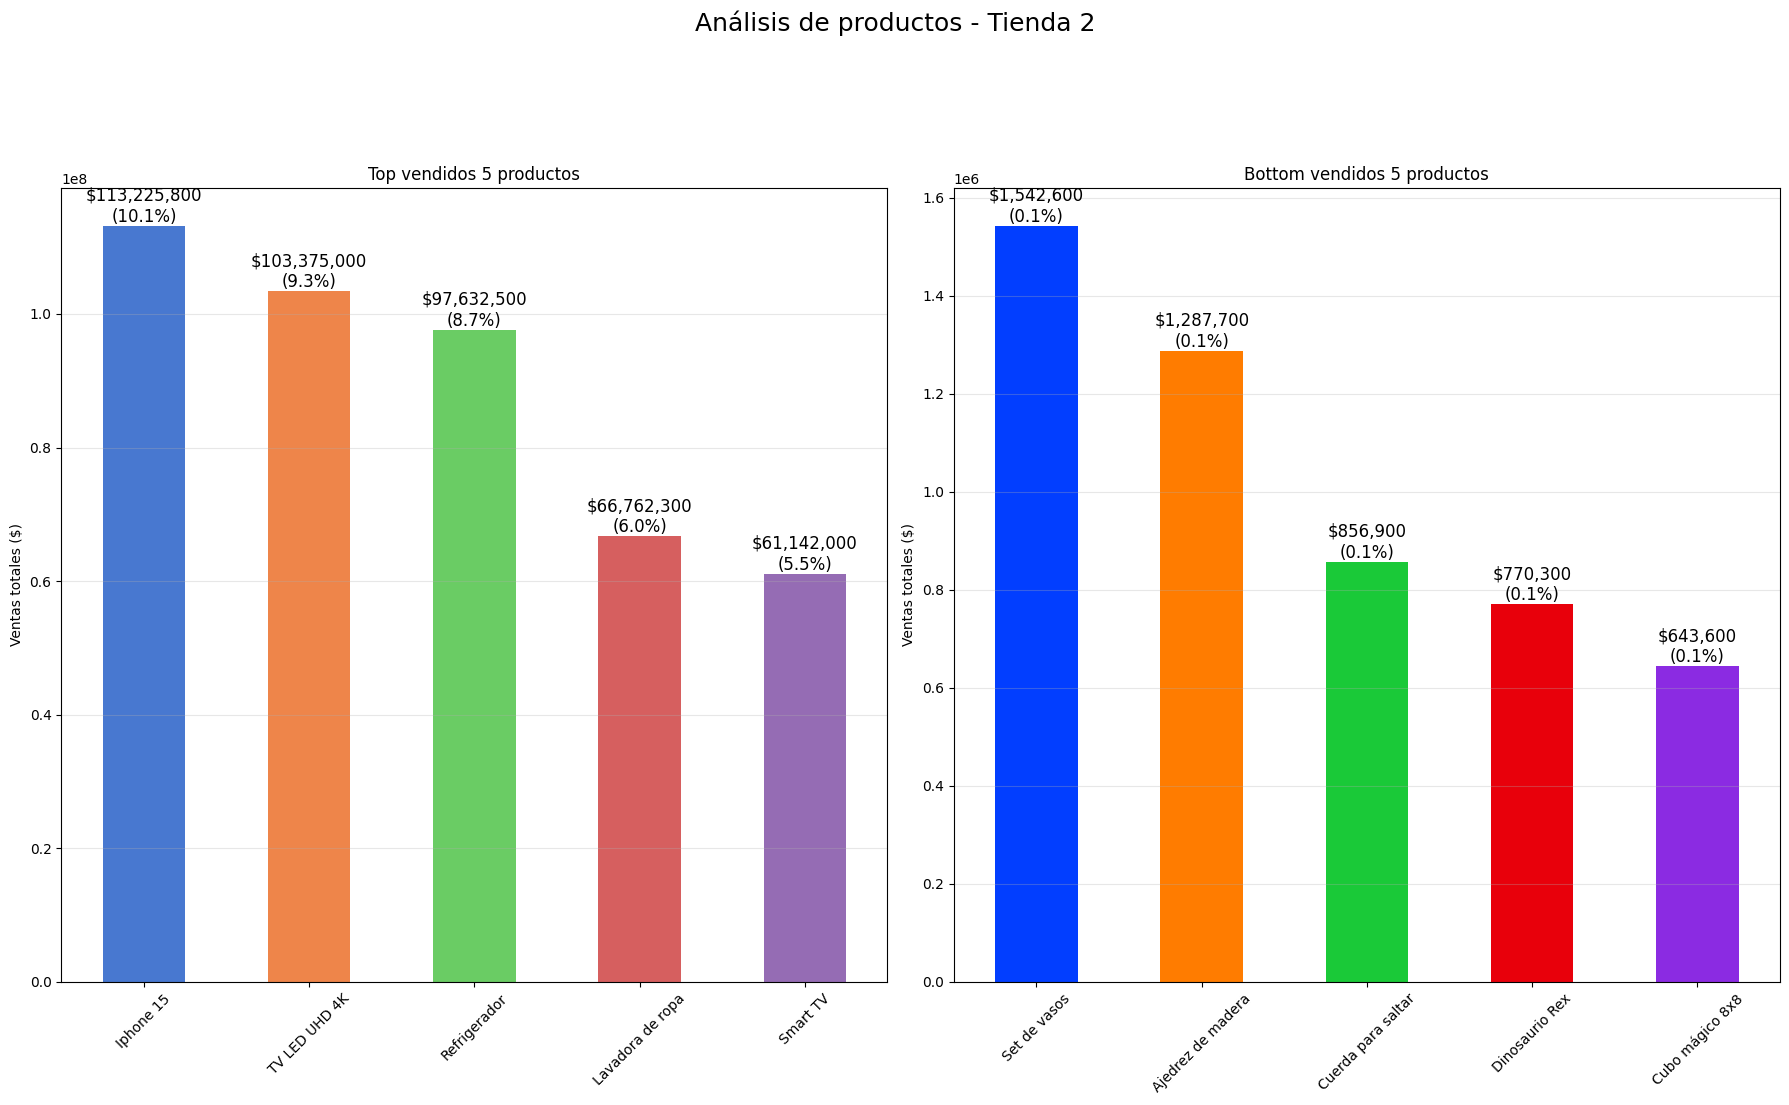

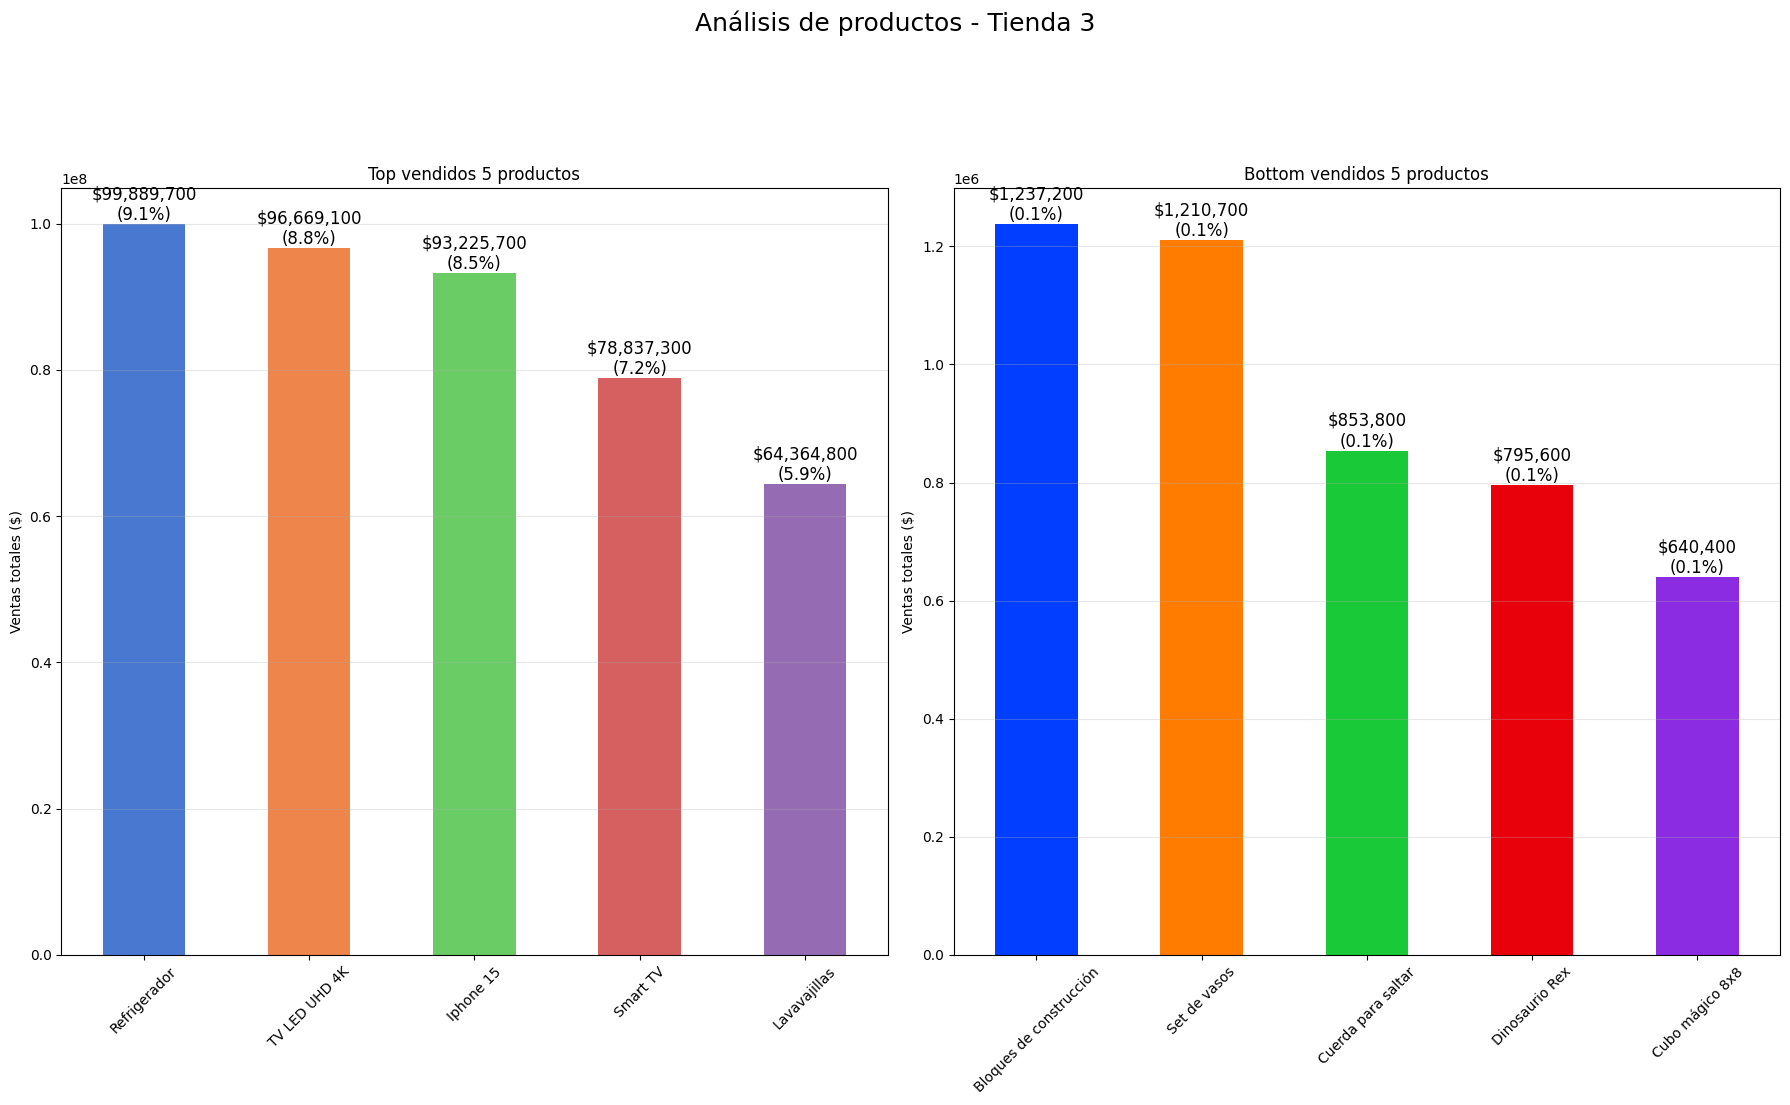

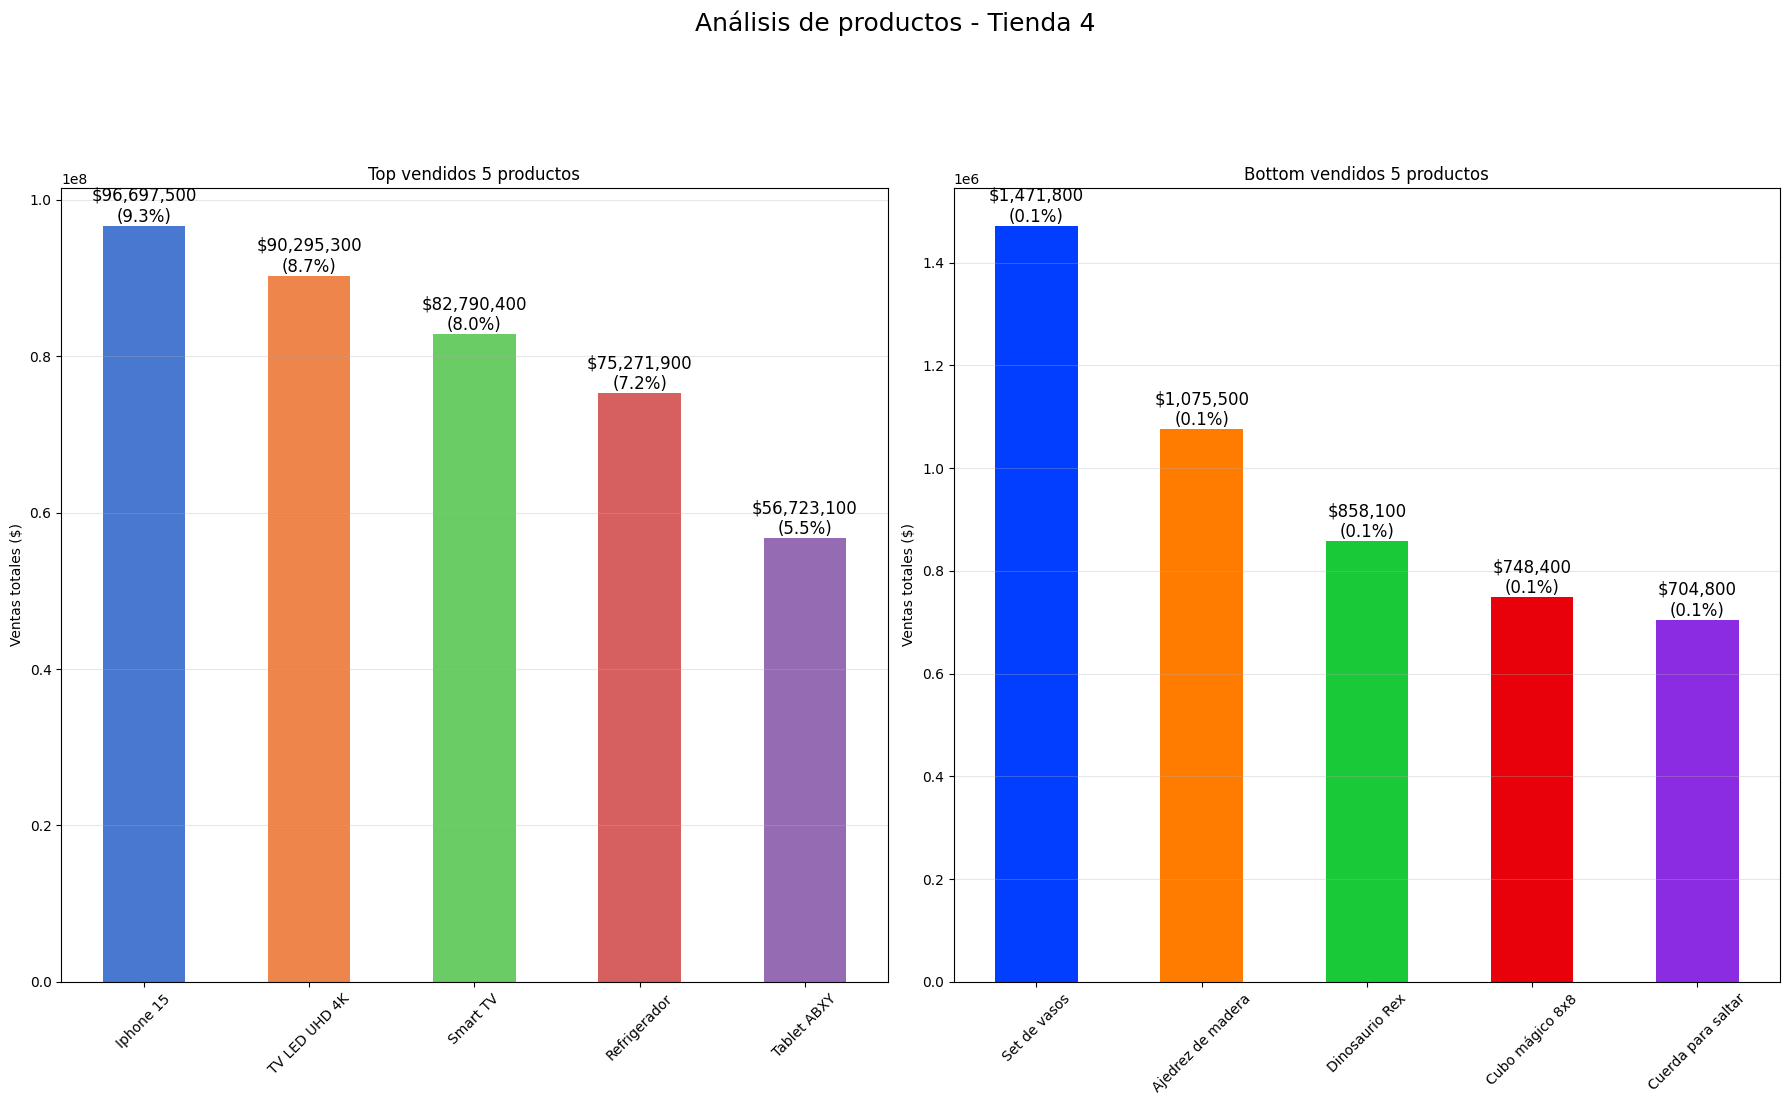

[None, None, None, None]

In [108]:
def plot_top_bottom_products(df, tienda_nombre, n_products=5):
    """
    Genera gráficos comparativos de productos más y menos vendidos con porcentajes

    Args:
        df: DataFrame con los datos de ventas
        tienda_nombre: Nombre de la tienda
        n_products: Número de productos a mostrar (por defecto 5)
    """
    # Cálculos simplificados
    product_sales = df.groupby('Producto')['Precio'].sum().sort_values(ascending=False)
    total_sales = product_sales.sum()

    # Selección de productos
    top = product_sales.head(n_products)
    bottom = product_sales.tail(n_products)

    # Configuración del gráfico
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 10))
    fig.suptitle(f'Análisis de productos - {tienda_nombre}', y=1.1, fontsize=18)

    # Gráfico de productos más vendidos
    top.plot(kind='bar', ax=ax1, color=sns.color_palette("muted", n_products))
    ax1.set_title(f'Top vendidos {n_products} productos')
    ax1.set_xlabel('')

    # Gráfico de productos menos vendidos
    bottom.plot(kind='bar', ax=ax2, color=sns.color_palette("bright", n_products))
    ax2.set_title(f'Bottom vendidos {n_products} productos')
    ax2.set_xlabel('')

    # Añadir porcentajes y formato común
    for ax, data in [(ax1, top), (ax2, bottom)]:
        # Calcular porcentajes
        percentajes = (data / total_sales * 100).round(1)

        # Añadir etiquetas
        for i, (val, pct) in enumerate(zip(data, percentajes)):
            ax.text(i, val, f'${val:,.0f}\n({pct}%)',
                   ha='center', va='bottom',
                   fontsize=12)

        # Configuración común
        ax.set_ylabel('Ventas totales ($)')
        ax.tick_params(axis='x', rotation=45)
        ax.grid(axis='y', alpha=0.3)

    plt.tight_layout()
    plt.show()

# Uso simplificado con list comprehension
[plot_top_bottom_products(df, name) for df, name in [
    (tienda_1, 'Tienda 1'),
    (tienda_2, 'Tienda 2'),
    (tienda_3, 'Tienda 3'),
    (tienda_4, 'Tienda 4')
]]

# 5. Envío promedio por tienda


       ANÁLISIS DE COSTOS PROMEDIO DE ENVÍO       
• Tienda 1: $26018.61
• Tienda 2: $25216.24
• Tienda 3: $24805.68
• Tienda 4: $23459.46


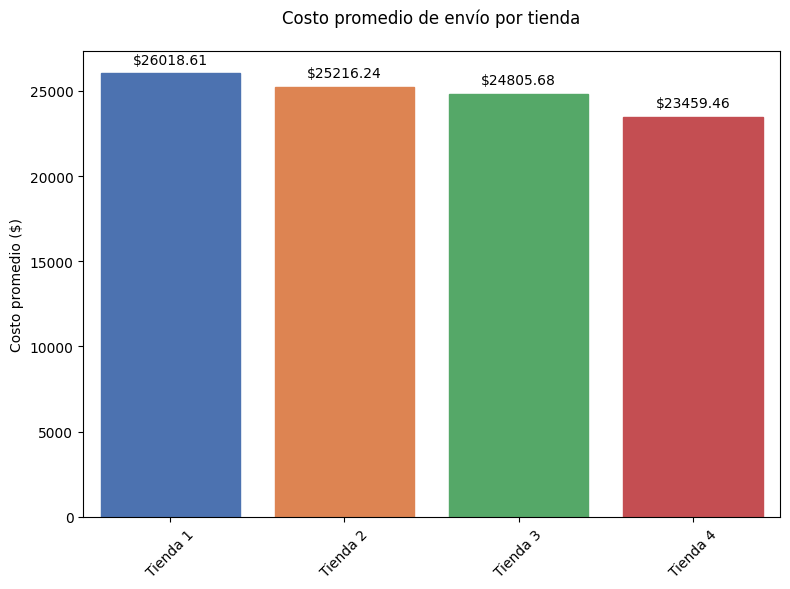

In [110]:
def analizar_costos_envio(tiendas, nombres_tiendas, col_costo='Costo de envío'):
    """
    Analizar y visualizar los costos promedio de envío por tienda.

    Args:
        tiendas: Lista de DataFrames con datos de cada tienda
        nombres_tiendas: Lista de nombres de las tiendas
        col_costo: Nombre de la columna con costos de envío (opcional)
    """
    # Cálculo de promedios usando list comprehension
    promedios = [df[col_costo].mean() for df in tiendas]

    # Resultados en consola
    print("\n" + "="*50)
    print("ANÁLISIS DE COSTOS PROMEDIO DE ENVÍO".center(50))
    print("="*50)
    for nombre, promedio in zip(nombres_tiendas, promedios):
        print(f"• {nombre}: ${promedio:.2f}")

    # Visualización
    colors = sns.color_palette("deep")
    plt.figure(figsize=(8, 6))
    ax = sns.barplot(x=nombres_tiendas, y=promedios)
    for i, bar in enumerate(ax.patches):
      bar.set_color(colors[i % len(colors)])
    # Personalización del gráfico
    ax.set_title("Costo promedio de envío por tienda", pad=20)
    ax.set_xlabel("")
    ax.set_ylabel("Costo promedio ($)")

    # Añadir etiquetas de valor
    for p in ax.patches:
        ax.annotate(f"${p.get_height():.2f}",
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='bottom',
                   xytext=(0, 5),
                   textcoords='offset points',
                   fontsize=10)

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Datos de ejemplo (reemplazar con tus datos reales)
tiendas = [tienda_1, tienda_2, tienda_3, tienda_4]
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

# definición de la función
analizar_costos_envio(tiendas, nombres_tiendas)


In [113]:
# Código para identificar la tienda con menos cantidad de ventas.
def analizar_tienda(df, nombre):
    facturacion = df[df['Precio'] > 0]['Precio'].sum()
    costo_envio_promedio = df['Costo de envío'].mean()
    calificacion_promedio = df['Calificación'].mean()

    return {
        'Tienda': nombre,
        'Facturación': facturacion,
        'Costo Envío Promedio': costo_envio_promedio,
        'Calificación Promedio': calificacion_promedio,

    }

resultados = [
    analizar_tienda(tienda_1, 'Tienda 1'),
    analizar_tienda(tienda_2, 'Tienda 2'),
    analizar_tienda(tienda_3, 'Tienda 3'),
    analizar_tienda(tienda_4, 'Tienda 4')
]

df_resultados = pd.DataFrame(resultados)
df_resultados.sort_values(by=['Facturación', 'Calificación Promedio'])

,Tienda,Facturación,Costo Envío Promedio,Calificación Promedio
3,Tienda 4,1038375700.00,23459.46,4.00
2,Tienda 3,1098019600.00,24805.68,4.05
1,Tienda 2,1116343500.00,25216.24,4.04
0,Tienda 1,1150880400.00,26018.61,3.98


# 6. RESULTADOS DE LOS ANALISÍS OBTENIDOS.

# Analisís.
A continuación se daran los resultados de los datos obtenidos por cada pregunta realizada.


1. Resultados de cuál de las 4 tiendas tiene mayor ventar y cuál tiene menores ventas.
      - La tienda con mayor cantidad de ventas es: Tienda_1 con un total de 1150880400.0
      - La tienda con menor cantidad de ventas es: Tienda_4 con un total de 1038375700.0
      *Las cantidades son representadas en pesos Chilenos CLP*

2. Resultados de cuál o cuales son los productos menos vendidos en las tiendas.
   -se determino que en cada una de las tiendas el objeto o producto menos vendio es el Cubo magico 8x8 y La cuerda de saltar.

3. Resultados del producto más vendido en cada una de las tiendas.
  - Tienda 1: TV LED UHD 4K
  - Tienda 2: Iphone 15
  - Tienda 3: Refrigerador
  - Tienda 4: Iphone 15



4. Resultados de la calificación promedio de cada tienda.
  - Tienda 1: 3.98
  - Tienda 2: 4.04
  - Tienda 3: 4.05
  - Tienda 4: 4.00
  
  En la cual se determino que la tienda 3 tiene un mejor calificación promedio de sus clientes.

5. Resultados del costo de envio promedio de cada tienda.
   - Tienda 1: $26018.61

   - Tienda 2: $25216.24

   - Tienda 3: $24805.68
   
   - Tienda 4: $23459.46

La tienda 1 es la que tiene un mayor costo de envio promedio, y la tienda 4 tiene un menor costo promedio de envio.
   